<a href="https://colab.research.google.com/github/joungminhee/project/blob/master/Health_Insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Imports

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [77]:
train_df = '/content/drive/MyDrive/Data/train 2.csv'
test_df = '/content/drive/MyDrive/Data/test 2.csv'
submission = '/content/drive/MyDrive/Data/sample_submission.csv'
train = pd.read_csv(train_df)
test = pd.read_csv(test_df)
sub = pd.read_csv(submission)
train.shape, test.shape, sub.shape

((243108, 12), (127037, 11), (127037, 2))

# data view

In [78]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243108 entries, 0 to 243107
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    243108 non-null  int64  
 1   Gender                243108 non-null  object 
 2   Age                   243108 non-null  int64  
 3   Driving_License       243108 non-null  int64  
 4   Region_Code           243108 non-null  float64
 5   Previously_Insured    243108 non-null  int64  
 6   Vehicle_Age           243108 non-null  object 
 7   Vehicle_Damage        243107 non-null  object 
 8   Annual_Premium        243107 non-null  float64
 9   Policy_Sales_Channel  243107 non-null  float64
 10  Vintage               243107 non-null  float64
 11  Response              243107 non-null  float64
dtypes: float64(5), int64(4), object(3)
memory usage: 22.3+ MB


In [79]:
test.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297


In [80]:
train.describe(include='object')

,Gender,Vehicle_Age,Vehicle_Damage
count,243108,243108,243107
unique,2,4,2
top,Male,1-2 Year,Yes
freq,131433,127629,122918


In [81]:
train.describe(exclude='object')

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,243108.000000,243108.000000,243108.000000,243108.000000,243108.000000,243107.000000,243107.000000,243107.000000,243107.000000
mean,121554.500000,38.792952,0.997873,26.375508,0.457385,30519.647131,112.087093,154.357081,0.122707
std,70179.378958,15.486218,0.046066,13.235228,0.498182,17175.412433,54.165859,83.695549,0.328102
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,60777.750000,25.000000,1.000000,15.000000,0.000000,24380.500000,29.000000,82.000000,0.000000
50%,121554.500000,36.000000,1.000000,28.000000,0.000000,31639.000000,133.000000,154.000000,0.000000
75%,182331.250000,49.000000,1.000000,35.000000,1.000000,39352.000000,152.000000,227.000000,0.000000
max,243108.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [82]:
# isnull()행 찾기
train[train.Response.isnull()]

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
243107,243108,Male,52,1,28.0,0,1-2,NaN,NaN,NaN,NaN,NaN


In [83]:
# na 행 값 삭제
train = train.dropna()

In [84]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243107 entries, 0 to 243106
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    243107 non-null  int64  
 1   Gender                243107 non-null  object 
 2   Age                   243107 non-null  int64  
 3   Driving_License       243107 non-null  int64  
 4   Region_Code           243107 non-null  float64
 5   Previously_Insured    243107 non-null  int64  
 6   Vehicle_Age           243107 non-null  object 
 7   Vehicle_Damage        243107 non-null  object 
 8   Annual_Premium        243107 non-null  float64
 9   Policy_Sales_Channel  243107 non-null  float64
 10  Vintage               243107 non-null  float64
 11  Response              243107 non-null  float64
dtypes: float64(5), int64(4), object(3)
memory usage: 24.1+ MB


In [85]:
test.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
dtype: int64

In [86]:
train.shape, test.shape

((243107, 12), (127037, 11))

In [87]:
train.Gender.value_counts()

Male      131432
Female    111675
Name: Gender, dtype: int64

In [88]:
train.Vehicle_Age.value_counts()

1-2 Year     127629
< 1 Year     105228
> 2 Years     10250
Name: Vehicle_Age, dtype: int64

In [89]:
train.Response.value_counts()

0.0    213276
1.0     29831
Name: Response, dtype: int64

In [90]:
train.Policy_Sales_Channel.value_counts()

152.0    85956
26.0     50765
124.0    47302
160.0    13865
156.0     6923
         ...  
2.0          1
84.0         1
123.0        1
75.0         1
43.0         1
Name: Policy_Sales_Channel, Length: 150, dtype: int64

In [91]:
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217.0,1.0
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183.0,0.0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27.0,1.0
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203.0,0.0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39.0,0.0


# EDA & 시각화

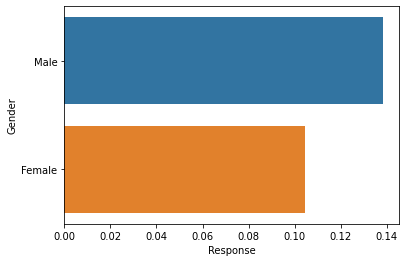

In [92]:
sns.barplot(y='Gender', x='Response', data=train, ci=None)
plt.show()

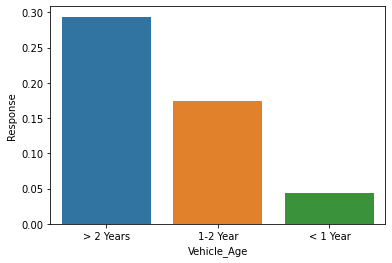

In [93]:
sns.barplot(x='Vehicle_Age', y='Response', data=train, ci=None)
plt.show()

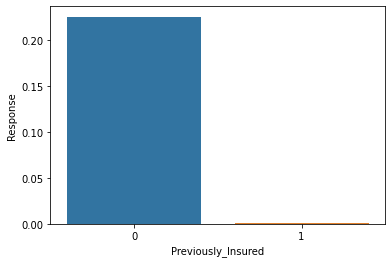

In [94]:
sns.barplot(x='Previously_Insured', y='Response', data=train, ci=None)
plt.show()

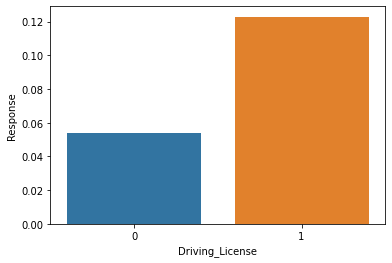

In [95]:
sns.barplot(x='Driving_License', y='Response', data=train, ci=None)
plt.show()

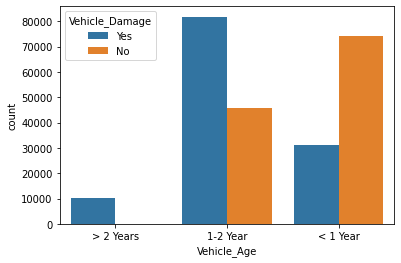

In [96]:
sns.countplot(data=train,x='Vehicle_Age',hue='Vehicle_Damage')
plt.show()

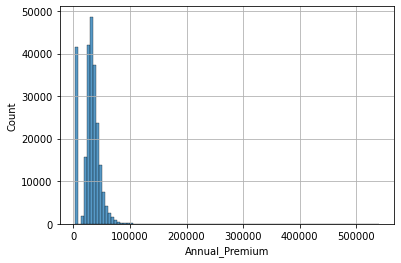

In [97]:
sns.histplot(x=train['Annual_Premium'], bins=100)
plt.grid()
plt.show()

In [98]:
train = train.drop(columns='id')
test = test.drop(columns='id')

In [99]:
train.shape, test.shape

((243107, 11), (127037, 10))

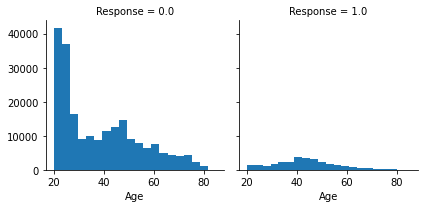

In [100]:
# 응답 여부에 따른 연령 분포
S = sns.FacetGrid(train, col='Response')
S.map(plt.hist,'Age', bins=20)
plt.show()

In [101]:
train.shape, test.shape

((243107, 11), (127037, 10))

# 전처리

In [102]:
# 카테고리별 라벨인코딩
from sklearn.preprocessing import LabelEncoder
cols = ['Gender','Vehicle_Age','Vehicle_Damage']
for col in cols:
    le = LabelEncoder()
    train[col] = le.fit_transform(train[col])
    test[col] = le.transform(test[col])

In [103]:
train

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,44,1,28.0,0,2,1,40454.0,26.0,217.0,1.0
1,1,76,1,3.0,0,0,0,33536.0,26.0,183.0,0.0
2,1,47,1,28.0,0,2,1,38294.0,26.0,27.0,1.0
3,1,21,1,11.0,1,1,0,28619.0,152.0,203.0,0.0
4,0,29,1,41.0,1,1,0,27496.0,152.0,39.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
243102,0,22,1,28.0,1,0,0,64347.0,124.0,175.0,0.0
243103,1,25,1,28.0,0,1,1,76491.0,124.0,186.0,0.0
243104,1,23,1,13.0,1,1,0,36681.0,152.0,197.0,0.0
243105,0,55,1,48.0,0,0,1,2630.0,124.0,221.0,0.0


In [104]:
#구간화 인코딩
def age_category(age):
    age = int(np.floor(age//10))
    return age

In [105]:
train['Age'] = train.Age.apply(age_category)
test['Age'] = test.Age.apply(age_category)

In [106]:
train.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,4,1,28.0,0,2,1,40454.0,26.0,217.0,1.0
1,1,7,1,3.0,0,0,0,33536.0,26.0,183.0,0.0
2,1,4,1,28.0,0,2,1,38294.0,26.0,27.0,1.0
3,1,2,1,11.0,1,1,0,28619.0,152.0,203.0,0.0
4,0,2,1,41.0,1,1,0,27496.0,152.0,39.0,0.0


In [107]:
test.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,1,2,1,11.0,1,1,0,35786.0,152.0,53
1,1,4,1,28.0,0,0,1,33762.0,7.0,111
2,1,4,1,28.0,0,0,1,40050.0,124.0,199
3,1,2,1,27.0,1,1,1,37356.0,152.0,187
4,1,2,1,28.0,1,1,0,59097.0,152.0,297


In [108]:
y = train.pop('Response')
train.shape, test.shape

((243107, 10), (127037, 10))

In [109]:
X = train.values.copy()

In [110]:
X.shape, y.shape

((243107, 10), (243107,))

#표준화

In [111]:
from sklearn.preprocessing import StandardScaler
num = ['Annual_Premium','Policy_Sales_Channel','Vintage']
scaler = StandardScaler()
train[num] = scaler.fit_transform(train[num])
test[num] = scaler.transform(test[num])

In [112]:
train.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,1,4,1,28.0,0,2,1,0.578407,-1.589327,0.748463
1,1,7,1,3.0,0,0,0,0.175621,-1.589327,0.342228
2,1,4,1,28.0,0,2,1,0.452645,-1.589327,-1.521674
3,1,2,1,11.0,1,1,0,-0.110661,0.736866,0.581190
4,0,2,1,41.0,1,1,0,-0.176045,0.736866,-1.378297


In [113]:
test.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,1,2,1,11.0,1,1,0,0.306622,0.736866,-1.211024
1,1,4,1,28.0,0,0,1,0.188779,-1.940102,-0.518034
2,1,4,1,28.0,0,0,1,0.554885,0.219934,0.533398
3,1,2,1,27.0,1,1,1,0.398032,0.736866,0.390021
4,1,2,1,28.0,1,1,0,1.663856,0.736866,1.704311


# 모델링

In [114]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, r2_score, accuracy_score

In [115]:
X_tr, X_te, y_tr, y_te =train_test_split(X,y,
                                         test_size=0.3,
                                         stratify=y,
                                         random_state=42)

# 의사결정나무

In [116]:
model = DecisionTreeClassifier()
model.fit(X_tr,y_tr)

te_pred = model.predict(X_te)

In [117]:
accuracy_xgb = accuracy_score(y_te, te_pred)
print("Accuracy: %.2f%%" % (accuracy_xgb * 100.0))

Accuracy: 82.46%


# XGBOOST

In [121]:
model_xgb = XGBClassifier()
model_xgb.fit(X_tr,y_tr)

te_pred = model_xgb.predict(X_te) 
accuracy_xgb = accuracy_score(y_te, te_pred)
print("Accuracy: %.2f%%" % (accuracy_xgb * 100.0))

Accuracy: 87.73%


In [123]:
# 경고 무시
import warnings
warnings.filterwarnings(action = 'ignore')

In [124]:
from sklearn.metrics import confusion_matrix

print(classification_report(y_te,te_pred))

              precision    recall  f1-score   support

         0.0       0.88      1.00      0.93     63984
         1.0       0.00      0.00      0.00      8949

    accuracy                           0.88     72933
   macro avg       0.44      0.50      0.47     72933
weighted avg       0.77      0.88      0.82     72933

